In [2]:
# pip install torch

In [3]:
# pip install torchvision

In [4]:
pip install pycocotools

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import torch
from torch.utils import data
from PIL import Image
from torchvision import transforms

class simpleDataset(data.Dataset):
    
    # initialise function of class
    def __init__(self, root, filenames, labels):
        # the data directory 
        self.root = root
        # the list of filename
        self.filenames = filenames
        # the list of label
        self.labels = labels

    # obtain the sample with the given index
    def __getitem__(self, index):
        # obtain filenames from list
        image_filename = self.filenames[index]
        # Load data and label
        image = Image.open(os.path.join(self.root, image_filename))
        label = self.labels[index]
        
        # output of Dataset must be tensor
        image = transforms.ToTensor()(image)
        label = torch.as_tensor(label, dtype=torch.int64)
        return image, label
    
    # the total number of samples (optional)
    def __len__(self):
        return len(self.filenames)

In [6]:
import json
from pycocotools.coco import COCO
with open('../labels/train.json', encoding='utf-8') as f:
    coco = COCO('../labels/train.json')



loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [7]:
coco.getCatIds()

[0, 1, 2, 3, 4, 5, 6, 7]

In [8]:
coco.loadAnns(48)

[{'id': 48,
  'image_id': 603,
  'category_id': 2,
  'segmentation': [],
  'area': 53775.7154,
  'bbox': [15.09, 105.39, 438.02, 122.77],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}}]

In [9]:
coco.loadImgs(2097)[0]['file_name']

'train_1451.png'

In [10]:
coco.getImgIds(catIds=2)

[2060,
 2095,
 2097,
 2098,
 2099,
 6213,
 6215,
 114767,
 96337,
 96338,
 96340,
 114772,
 98390,
 98392,
 114777,
 98394,
 98395,
 96363,
 2160,
 2163,
 2164,
 98436,
 98437,
 98439,
 98440,
 98441,
 98443,
 98444,
 98447,
 98449,
 98452,
 90261,
 98453,
 2199,
 2200,
 90265,
 90266,
 98458,
 98459,
 98460,
 98455,
 90271,
 90272,
 90273,
 90275,
 90276,
 90277,
 90279,
 90281,
 90282,
 71877,
 96460,
 114896,
 114897,
 96469,
 96492,
 96494,
 96495,
 98582,
 98583,
 98584,
 98585,
 114973,
 96580,
 133458,
 92499,
 133459,
 133460,
 96602,
 4455,
 4456,
 115053,
 115054,
 115055,
 98680,
 131451,
 131453,
 98694,
 98695,
 98696,
 98697,
 115094,
 115095,
 131487,
 82337,
 82339,
 82340,
 98734,
 113070,
 4528,
 4529,
 4530,
 4531,
 113071,
 113072,
 115131,
 111064,
 111065,
 66012,
 487,
 98803,
 98804,
 115211,
 82466,
 82467,
 82468,
 82469,
 82470,
 82471,
 21032,
 21033,
 82472,
 82473,
 82475,
 113189,
 113190,
 10799,
 115250,
 82500,
 10829,
 113229,
 115287,
 115288,
 603,


In [11]:
coco.getAnnIds(catIds=2)

[46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 60,
 62,
 63,
 64,
 65,
 75,
 76,
 77,
 84,
 86,
 87,
 88,
 89,
 94,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 124,
 125,
 135,
 137,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 193,
 196,
 199,
 205,
 206,
 207,
 209,
 210,
 211,
 213,
 214,
 216,
 217,
 218,
 219,
 223,
 224,
 236,
 710,
 711,
 712,
 713,
 714,
 715,
 751,
 752,
 754,
 940,
 941,
 942,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 1049,
 1057,
 1058,
 1059,
 1127,
 1173,
 1197,
 3078,
 3089,
 3091,
 3092,
 3093,
 3094,
 3095,
 3229,
 3230,
 3233,
 3234,
 3235,
 3236,
 3238,
 3239,
 3257,
 3259,
 3260,
 3262,
 3263,
 3264,
 3265,
 3402,
 3404,
 3405,
 3517,
 3571,
 3572,
 3578,
 3580,
 3581,
 3586,
 3587,
 3588,
 3589,
 3593,
 3799,
 3800,
 3801,
 3803,
 3886,
 3896,
 3897,
 3898,
 3899,
 3900,
 4136,
 4138,
 4139,
 4144,
 4145,
 4146,
 4147,
 4148,
 4149,
 4150,
 4151,
 4152,
 4153,
 4154,

In [12]:
coco.loadAnns(48)

[{'id': 48,
  'image_id': 603,
  'category_id': 2,
  'segmentation': [],
  'area': 53775.7154,
  'bbox': [15.09, 105.39, 438.02, 122.77],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}}]

In [13]:
coco.getImgIds(catIds=2)
# input : category_id
# output : image_id

[2060,
 2095,
 2097,
 2098,
 2099,
 6213,
 6215,
 114767,
 96337,
 96338,
 96340,
 114772,
 98390,
 98392,
 114777,
 98394,
 98395,
 96363,
 2160,
 2163,
 2164,
 98436,
 98437,
 98439,
 98440,
 98441,
 98443,
 98444,
 98447,
 98449,
 98452,
 90261,
 98453,
 2199,
 2200,
 90265,
 90266,
 98458,
 98459,
 98460,
 98455,
 90271,
 90272,
 90273,
 90275,
 90276,
 90277,
 90279,
 90281,
 90282,
 71877,
 96460,
 114896,
 114897,
 96469,
 96492,
 96494,
 96495,
 98582,
 98583,
 98584,
 98585,
 114973,
 96580,
 133458,
 92499,
 133459,
 133460,
 96602,
 4455,
 4456,
 115053,
 115054,
 115055,
 98680,
 131451,
 131453,
 98694,
 98695,
 98696,
 98697,
 115094,
 115095,
 131487,
 82337,
 82339,
 82340,
 98734,
 113070,
 4528,
 4529,
 4530,
 4531,
 113071,
 113072,
 115131,
 111064,
 111065,
 66012,
 487,
 98803,
 98804,
 115211,
 82466,
 82467,
 82468,
 82469,
 82470,
 82471,
 21032,
 21033,
 82472,
 82473,
 82475,
 113189,
 113190,
 10799,
 115250,
 82500,
 10829,
 113229,
 115287,
 115288,
 603,


In [14]:
coco.getAnnIds(imgIds=2060)
# input : image_id
# output : id (bbox 있는 dict 영역)

[106]

In [15]:
bbox = coco.loadAnns(106)[0]['bbox']
bbox = [int(x) for x in bbox]
# input : id
# output : bbox-(x,y,w,h) 정보

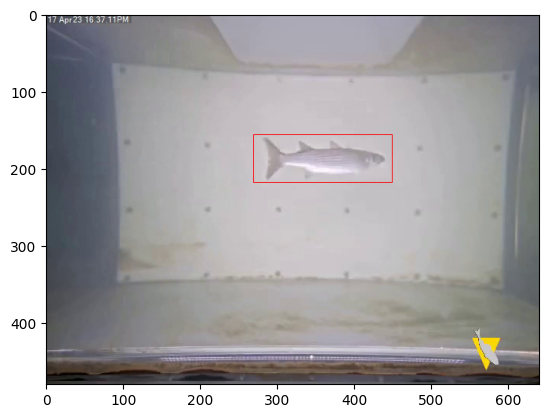

In [17]:
import cv2
import matplotlib.pyplot as plt
file = '../train/' + coco.loadImgs(2060)[0]['file_name']

tmp = cv2.imread(file)
img = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, rec=tuple(bbox), color=(255,0,0))
# cv2.rectangle(img, pt1=tuple((bbox[0],bbox[1])), pt2=tuple((bbox[2],bbox[3])), color=(255,0,0))
plt.imshow(img)

In [18]:
import json
from pycocotools.coco import COCO
from tqdm.notebook import tqdm
def getAlldata(json_path):
    with open(json_path, encoding='utf-8') as f:
        coco = COCO(json_path)
        files = []
        Labels = []
        for i in tqdm(list(coco.getCatIds())):
            now_imgIDs = list(coco.getImgIds(catIds=i))
            for idx in now_imgIDs:
                files.append(coco.loadImgs(idx)[0]['file_name'])
                Labels.append(i)

    return files, Labels

In [22]:
train_json_path = '../labels/train.json'
files, Labels = getAlldata(train_json_path)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


  0%|          | 0/8 [00:00<?, ?it/s]

In [23]:
import pandas as pd

df = pd.DataFrame({'file_name': files, 'class': Labels})
df

,file_name,class
0,train_10756.png,0
1,train_16934.png,0
2,train_97863.png,0
3,train_16935.png,0
4,train_11858.png,0
...,...,...
5631,train_67459.png,7
5632,train_67460.png,7
5633,train_67461.png,7
5634,train_53145.png,7


In [ ]:
# import shutil
# import os
# def move_file(source, destination):
#     # source와 destination이 존재하는지 확인
#     if os.path.exists(source):
#         # 파일을 destination으로 이동
#         shutil.copy(source, destination)
#     #     print(f"파일을 {destination} 으로 성공적으로 이동했습니다.")
#     # else:
#     #     print(f"파일 {source} 가 존재하지 않습니다.")

# # 사용 예시
# source_path = '../data/train/'
# destination_path = '../data/train_fishOnly/'

# # move_file(source_path, destination_path)
# for row in df.iterrows():
#     move_file(f"{source_path}{row[1].values[0]}", destination_path)

In [24]:
coco.getAnnIds(catIds=2)

[46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 60,
 62,
 63,
 64,
 65,
 75,
 76,
 77,
 84,
 86,
 87,
 88,
 89,
 94,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 124,
 125,
 135,
 137,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 193,
 196,
 199,
 205,
 206,
 207,
 209,
 210,
 211,
 213,
 214,
 216,
 217,
 218,
 219,
 223,
 224,
 236,
 710,
 711,
 712,
 713,
 714,
 715,
 751,
 752,
 754,
 940,
 941,
 942,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 1049,
 1057,
 1058,
 1059,
 1127,
 1173,
 1197,
 3078,
 3089,
 3091,
 3092,
 3093,
 3094,
 3095,
 3229,
 3230,
 3233,
 3234,
 3235,
 3236,
 3238,
 3239,
 3257,
 3259,
 3260,
 3262,
 3263,
 3264,
 3265,
 3402,
 3404,
 3405,
 3517,
 3571,
 3572,
 3578,
 3580,
 3581,
 3586,
 3587,
 3588,
 3589,
 3593,
 3799,
 3800,
 3801,
 3803,
 3886,
 3896,
 3897,
 3898,
 3899,
 3900,
 4136,
 4138,
 4139,
 4144,
 4145,
 4146,
 4147,
 4148,
 4149,
 4150,
 4151,
 4152,
 4153,
 4154,

---

In [25]:
import os
import torch
from torch.utils import data
from PIL import Image
from torchvision import transforms

In [26]:

class simpleDataset(data.Dataset):
    
    # initialise function of class
    def __init__(self, root, filenames, labels):
        # the data directory 
        self.root = root
        # the list of filename
        self.filenames = filenames
        # the list of label
        self.labels = labels

    # obtain the sample with the given index
    def __getitem__(self, index):
        # obtain filenames from list
        image_filename = self.filenames[index]
        # Load data and label
        image = Image.open(os.path.join(self.root, image_filename))
        label = self.labels[index]
        
        # output of Dataset must be tensor
        image = transforms.ToTensor()(image)
        label = torch.as_tensor(label, dtype=torch.int64)
        return image, label
    
    # the total number of samples (optional)
    def __len__(self):
        return len(self.filenames)

In [27]:

# data directory
root = './train_fishOnly/'

# assume we have 3 jpg images
filenames = files

# the class of image might be ['black cat', 'tabby cat', 'tabby cat']
labels = Labels

# create own Dataset
my_dataset = simpleDataset(root=root,
                           filenames=filenames,
                           labels=labels
                           )

In [ ]:
# data loader
batch_size = 1
num_workers = 6

data_loader = torch.utils.data.DataLoader(my_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers
                                         )


import numpy as np
import matplotlib.pyplot as plt

# for images, labels in data_loader:
#     # image shape is [batch_size, 3 (due to RGB), height, width]
#     img = transforms.ToPILImage()(images[0])
#     plt.imshow(img)
#     plt.show()
#     print(labels)
    

In [28]:
import os
import torch
import torch.utils.data
import torchvision
from PIL import Image
from pycocotools.coco import COCO

class myOwnDataset(torch.utils.data.Dataset):
    def __init__(self, root, annotation, transforms=None):
        self.root = root
        self.transforms = transforms
        self.coco = COCO(annotation)
        self.ids = list(sorted(self.coco.imgs.keys()))

    def __getitem__(self, index):
        # Own coco file
        coco = self.coco
        # Image ID
        img_id = self.ids[index]
        # List: get annotation id from coco
        ann_ids = coco.getAnnIds(imgIds=img_id)
        # Dictionary: target coco_annotation file for an image
        coco_annotation = coco.loadAnns(ann_ids)
        # path for input image
        path = coco.loadImgs(img_id)[0]['file_name']
        # open the input image
        img = Image.open(os.path.join(self.root, path))

        # number of objects in the image
        num_objs = len(coco_annotation)

        # Bounding boxes for objects
        # In coco format, bbox = [xmin, ymin, width, height]
        # In pytorch, the input should be [xmin, ymin, xmax, ymax]
        boxes = []
        for i in range(num_objs):
            xmin = coco_annotation[i]['bbox'][0]
            ymin = coco_annotation[i]['bbox'][1]
            xmax = xmin + coco_annotation[i]['bbox'][2]
            ymax = ymin + coco_annotation[i]['bbox'][3]
            boxes.append([xmin, ymin, xmax, ymax])
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # Labels (In my case, I only one class: target class or background)
        labels = torch.ones((num_objs,), dtype=torch.int64)
        # Tensorise img_id
        img_id = torch.tensor([img_id])
        # Size of bbox (Rectangular)
        areas = []
        for i in range(num_objs):
            areas.append(coco_annotation[i]['area'])
        areas = torch.as_tensor(areas, dtype=torch.float32)
        # Iscrowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Annotation is in dictionary format
        my_annotation = {}
        my_annotation["boxes"] = boxes
        my_annotation["labels"] = labels
        my_annotation["image_id"] = img_id
        my_annotation["area"] = areas
        my_annotation["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, my_annotation

    def __len__(self):
        return len(self.ids)

In [29]:
# In my case, just added ToTensor
def get_transform():
    custom_transforms = []
    custom_transforms.append(torchvision.transforms.ToTensor())
    return torchvision.transforms.Compose(custom_transforms)

In [31]:
# path to your own data and coco file
train_data_dir = 'train_fishOnly/'
train_coco = 'modified_train.json'

# create own Dataset
my_dataset = myOwnDataset(root=train_data_dir,
                          annotation=train_coco,
                          transforms=get_transform()
                          )

# collate_fn needs for batch
def collate_fn(batch):
    return tuple(zip(*batch))

# Batch size
train_batch_size = 1

# own DataLoader
data_loader = torch.utils.data.DataLoader(my_dataset,
                                          batch_size=train_batch_size,
                                          shuffle=True,
                                          num_workers=4,
                                          collate_fn=collate_fn)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [32]:
# select device (whether GPU or CPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# DataLoader is iterable over Dataset
for imgs, annotations in data_loader:
    imgs = list(img.to(device) for img in imgs)
    annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
    print(annotations)

[{'boxes': tensor([[309.0900, 236.3600, 469.0900, 344.8500]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'image_id': tensor([111572], device='cuda:0'), 'area': tensor([17358.4004], device='cuda:0'), 'iscrowd': tensor([0], device='cuda:0')}]
[{'boxes': tensor([[151.3300, 302.5300, 393.7000, 371.5200]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'image_id': tensor([12447], device='cuda:0'), 'area': tensor([16721.1055], device='cuda:0'), 'iscrowd': tensor([0], device='cuda:0')}]
[{'boxes': tensor([[129.3000, 273.3800, 526.9700, 390.6600]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'image_id': tensor([130699], device='cuda:0'), 'area': tensor([46638.7383], device='cuda:0'), 'iscrowd': tensor([0], device='cuda:0')}]
[{'boxes': tensor([[ 86.5800, 304.4500, 241.9200, 345.6100],
        [ 10.4600, 321.5300, 143.2800, 360.3700]], device='cuda:0'), 'labels': tensor([1, 1], device='cuda:0'), 'image_id': tensor([78704], device='cuda:0'), 'area': tensor

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model
    

# 2 classes; Only target class or background
num_classes = 8
num_epochs = 10
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)
    
# parameters
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

len_dataloader = len(data_loader)

for epoch in range(num_epochs):
    model.train()
    i = 0    
    for imgs, annotations in data_loader:
        i += 1
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        loss_dict = model(imgs, annotations)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        print(f'Iteration: {i}/{len_dataloader}, Loss: {losses}')

## 모델 저장

In [ ]:
torch.save(model.state_dict(), '../model/first_weights.pth')

In [ ]:
model.eval()

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageDraw, ImageFont

model.to('cuda')
# 이미지 열기
image = Image.open('../data/test/test_740.png')

# 이미지를 PyTorch 텐서로 변환
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)
img = img.to('cuda')

# 모델에 입력하기 위해 배치 차원 추가
# img = img.unsqueeze(0)

# 추론 수행
with torch.no_grad():
    predictions = model([img])

# 이미지에 바운딩 박스와 라벨링 텍스트 추가
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)  # 폰트와 사이즈 선택
for box, label in zip(predictions[0]['boxes'], predictions[0]['labels']):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red', width=3)
    draw.text((box[0], box[1]), f"Label: {label}", fill='red', font = font)

# 결과 이미지 보기 또는 저장
image.show()  # 이미지를 보여줍니다.

In [ ]:
predictions

[{'boxes': tensor([[ 21.3029, 250.2072, 232.4095, 360.0945],
          [166.1597, 215.2282, 475.9932, 332.3275],
          [ 72.0927, 260.6073, 226.7756, 322.0105],
          [  0.6939, 227.3095, 302.2549, 381.5117]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.4172, 0.3183, 0.1500, 0.0648], device='cuda:0')}]

---

## modified_train.json 생성

In [ ]:
with open('../data/labels/train.json', 'r') as file:
    coco_data = json.load(file)
coco_data['images']

[{'id': 1,
  'width': 640,
  'height': 480,
  'file_name': 'train_0.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 3,
  'width': 640,
  'height': 480,
  'file_name': 'train_1.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 4,
  'width': 640,
  'height': 480,
  'file_name': 'train_2.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 5,
  'width': 640,
  'height': 480,
  'file_name': 'train_3.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 6,
  'width': 640,
  'height': 480,
  'file_name': 'train_4.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 8,
  'width': 640,
  'height': 480,
  'file_name': 'train_5.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 9,
  'width': 640,
  'height': 480,
  'file_name': 'train_6.png',
  'license': 0,
  'f

In [ ]:
import json

# COCO JSON 파일 읽기
with open('../data/labels/train.json', 'r') as file:
    coco_data = json.load(file)

# 파일명이 존재하지 않는 'images' 항목 필터링
# images_with_filename = [image for image in coco_data['images'] if image['file_name'] in [item['file_name'] for item in files]]
images_with_filename = [image for image in coco_data['images'] if image['file_name'] in files]
# 기존 'images' 데이터 수정
coco_data['images'] = images_with_filename

# 수정된 데이터 JSON 파일로 저장
with open('../data/labels/modified_train.json', 'w') as file:
    json.dump(coco_data, file)

---

## 저장된 모델 불러와서 실행

In [35]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [36]:
num_classes = 8
model = get_model_instance_segmentation(num_classes)

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.load("third_trained.pt", map_location=device)
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [38]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [62]:
# 폰트 리스트 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['/usr/share/fonts/truetype/fonts-guru-extra/Saab.ttf',
 '/usr/share/fonts/truetype/tlwg/Kinnari-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-ExtraLight.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypo-Bold.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansMono-Regular.ttf',
 '/usr/share/fonts/truetype/tibetan-machine/TibetanMachineUni.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/kacst/KacstFarsi.ttf',
 '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf',
 '/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf',
 '/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Italic.ttf',
 '/usr/share/fonts/opentype/mathjax/MathJax_Fraktur-Regular.otf',
 '/usr/share/fonts/truetype/Navilu/Navilu.ttf',
 '/usr/share/fonts/truetype/kacst/KacstOffice.ttf',
 '/usr/share/fonts/truetype/tlwg/Sawasdee-Oblique.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/tlwg/Waree.ttf',
 '/usr/share/fonts/truetype

In [104]:
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageDraw, ImageFont

model.to('cuda')
# 이미지 열기
image = Image.open('../test/test_1.png')

# 이미지를 PyTorch 텐서로 변환
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)
img = img.to('cuda')

# 모델에 입력하기 위해 배치 차원 추가
# img = img.unsqueeze(0)

# 추론 수행
with torch.no_grad():
    predictions = model([img])

label = predictions[0]['labels']

# 이미지에 바운딩 박스와 라벨링 텍스트 추가
draw = ImageDraw.Draw(image)
font = ImageFont.truetype('/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', 20)  # 폰트와 사이즈 선택
for box, label in zip(predictions[0]['boxes'], predictions[0]['labels']):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red', width=3)
    draw.text((box[0], box[1]), f"Label: {label}", fill='red', font = font)
# 결과 이미지 보기 또는 저장
# image.show()  # 이미지를 보여줍니다.

# savePath = "../test_result/" + str("output.png")
# image.save(savePath)

{tensor(3, device='cuda:0')}


---

## test 데이터셋으로 성능 검증 및 answer_sample.json 생성

In [47]:
pip install natsort

Note: you may need to restart the kernel to use updated packages.


In [56]:
import os
import natsort

os.chdir('../test/')
# print(os.getcwd())
filenames = os.listdir()
filenames = natsort.natsorted(filenames)
print((filenames))

['test_0.png', 'test_1.png', 'test_2.png', 'test_3.png', 'test_4.png', 'test_5.png', 'test_6.png', 'test_7.png', 'test_8.png', 'test_9.png', 'test_10.png', 'test_11.png', 'test_12.png', 'test_13.png', 'test_14.png', 'test_15.png', 'test_16.png', 'test_17.png', 'test_18.png', 'test_19.png', 'test_20.png', 'test_21.png', 'test_22.png', 'test_23.png', 'test_24.png', 'test_25.png', 'test_26.png', 'test_27.png', 'test_28.png', 'test_29.png', 'test_30.png', 'test_31.png', 'test_32.png', 'test_33.png', 'test_34.png', 'test_35.png', 'test_36.png', 'test_37.png', 'test_38.png', 'test_39.png', 'test_40.png', 'test_41.png', 'test_42.png', 'test_43.png', 'test_44.png', 'test_45.png', 'test_46.png', 'test_47.png', 'test_48.png', 'test_49.png', 'test_50.png', 'test_51.png', 'test_52.png', 'test_53.png', 'test_54.png', 'test_55.png', 'test_56.png', 'test_57.png', 'test_58.png', 'test_59.png', 'test_60.png', 'test_61.png', 'test_62.png', 'test_63.png', 'test_64.png', 'test_65.png', 'test_66.png', 'tes

In [70]:
print(filenames[0].replace(".", "_").split("_")[1])

0


In [77]:
from collections import OrderedDict

data = {}
data['images'] = []
false = False

for i, item in enumerate(filenames):
    file_data = OrderedDict()

    file_data["id"] = i+1
    file_data["width"] = 640
    file_data["height"] = 480
    file_data["file_name"] = item
    file_data["license"] = 0
    file_data["flickr_url"] = ""
    file_data["coco_url"] = ""
    file_data["date_captured"] = 0
    file_data["bbox"] = [
       411.24,
       272.6,
       148.35,
       45.83
    ]
    file_data["attributes"] = {
       "occluded": false,
       "rotation": 0.0
    }

    data['images'].append(file_data)

    i += 1

# print(json.dumps(data, ensure_ascii=False, indent="\t"))
with open('../test.json', 'w', encoding="utf-8") as make_file:
  json.dump(data, make_file, ensure_ascii=False, indent="\t")

---

In [ ]:
model.to('cuda')

data = {}
data["annotations"] = []

for i, item in enumerate(filenames):
    
    image_path = '../test/' + str(item)
    image_num = filenames[0].replace(".", "_").split("_")[1]
    image = Image.open(image_path)

    transform = transforms.Compose([transforms.ToTensor()])
    img = transform(image)
    img = img.to('cuda')

    with torch.no_grad():
        predictions = model([img])

    if label >= 0:
        draw = ImageDraw.Draw(image)
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)  # 폰트와 사이즈 선택
        
        for box, label in zip(predictions[0]['boxes'], predictions[0]['labels']):
            draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red', width=3)
            draw.text((box[0], box[1]), f"Label: {label}", fill='red', font = font)
        
        area = float(box[2] * box[3])

        file_data = OrderedDict()
        file_data["id"] = i + 1
        file_data["image_id"] = image_num
        file_data["category_id"] = label
        file_data["segmentation"] = []
        file_data["area"] = area
        file_data["bbox"] = [
            box[0],
            box[1],
            box[2],
            box[3]
        ]
        file_data["iscrowd"] = 0
        file_data["attributes"] = {
        "occluded": false,
        "rotation": 0.0
        }
        i += 1

        savePath = "../test_result/" + str(item)
        image.save(savePath)

with open('../test.json', 'w', encoding="utf-8") as make_file:
  json.dump(data, make_file, ensure_ascii=False, indent="\t")